In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/forest_fire/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
58/58 [==============================] - 276s 5s/step - loss: 0.2388 - accuracy: 0.9105 - val_loss: 0.4385 - val_accuracy: 0.8235
Epoch 2/10
58/58 [==============================] - 9s 159ms/step - loss: 0.1607 - accuracy: 0.9476 - val_loss: 0.2736 - val_accuracy: 0.8824
Epoch 3/10
58/58 [==============================] - 9s 156ms/step - loss: 0.1614 - accuracy: 0.9498 - val_loss: 0.3145 - val_accuracy: 0.8529
Epoch 4/10
58/58 [==============================] - 9s 156ms/step - loss: 0.1119 - accuracy: 0.9623 - val_loss: 0.1987 - val_accuracy: 0.8824
Epoch 5/10
58/58 [==============================] - 9s 161ms/step - loss: 0.1182 - accuracy: 0.9629 - val_loss: 0.2205 - val_accuracy: 0.8824
Epoch 6/10
58/58 [==============================] - 9s 155ms/step - loss: 0.1090 - accuracy: 0.9634 - val_loss: 0.2144 - val_accuracy: 0.9559
Epoch 7/10
58/58 [==============================] - 9s 154ms/step - loss: 0.0881 - accuracy: 0.9733 - val_loss: 0.3449 - val_accuracy: 0.8824
Epoch 8

In [8]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 60ms/step


In [9]:
predictions

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [10]:
print(len(predictions))

68


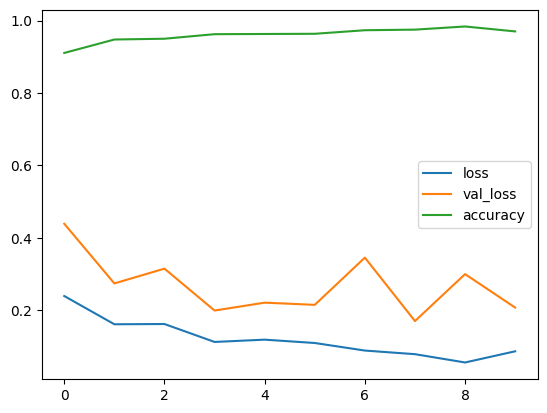

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

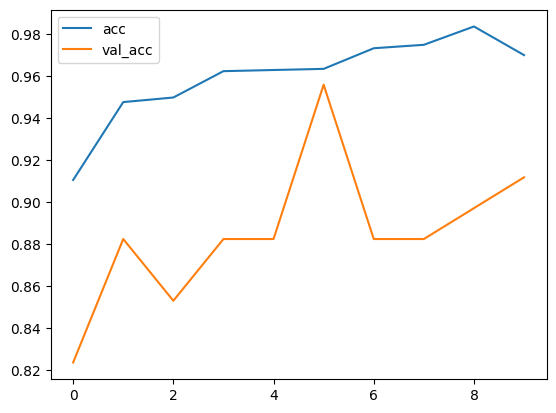

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 88ms/step
[[0.]]


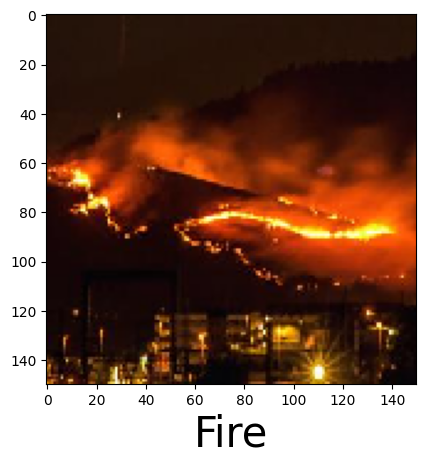

In [15]:
predictImage("/content/drive/MyDrive/forest_fire/Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 29ms/step
[[0.]]


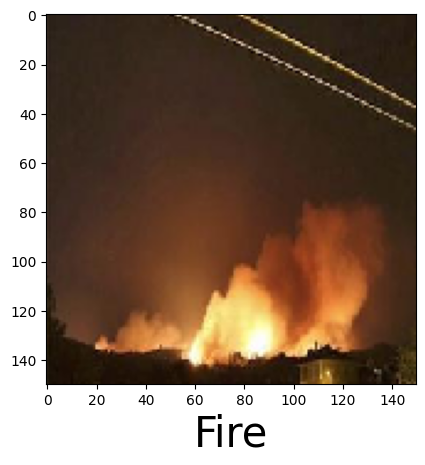

In [16]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/fire/abc190.jpg')

1/1 [==============================] - 0s 29ms/step
[[1.]]


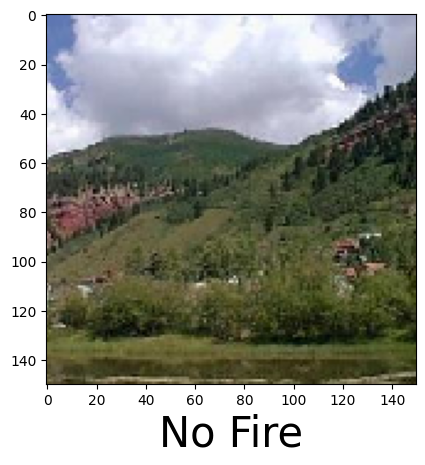

In [17]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc346.jpg')

1/1 [==============================] - 0s 28ms/step
[[1.]]


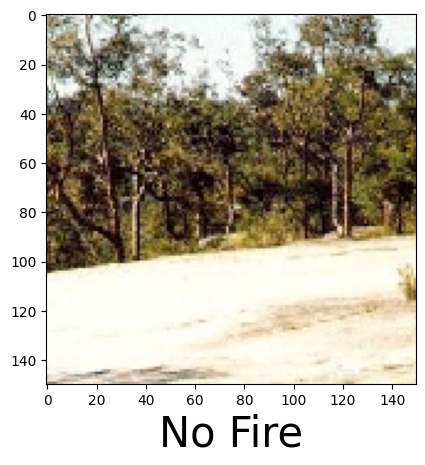

In [18]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc361.jpg')

1/1 [==============================] - 0s 30ms/step
[[0.]]


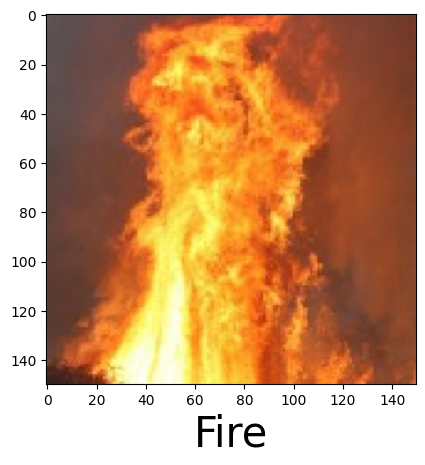

In [19]:
predictImage('/content/drive/MyDrive/forest_fire/Training and Validation/fire/abc011.jpg')

1/1 [==============================] - 0s 28ms/step
[[0.]]


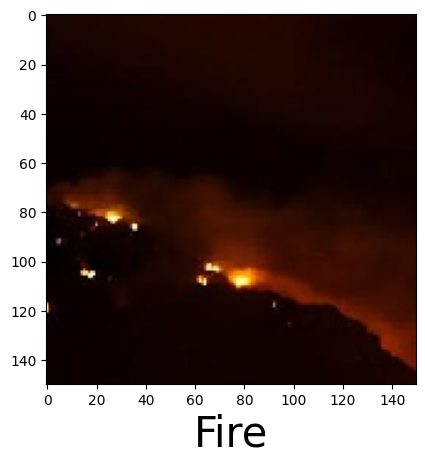

In [20]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/fire/abc172.jpg')

1/1 [==============================] - 0s 29ms/step
[[1.]]


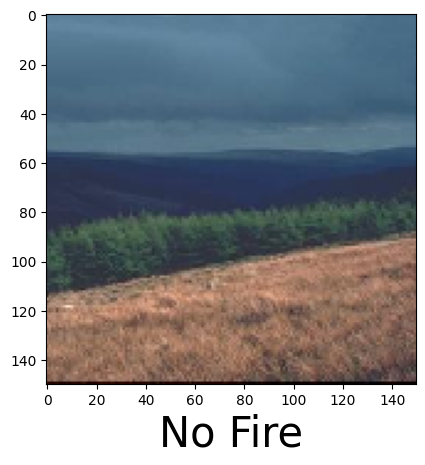

In [21]:
predictImage('/content/drive/MyDrive/forest_fire/Testing/nofire/abc341.jpg')